In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
rng = np.random.default_rng()

In [3]:
df = pd.read_csv('standings2.csv')
df = df.set_index("Team")
df

,Balancing,Halfpipe,Funnel Endurance,Newton's Cradle,Long Jump,5 Meter Hurdles,Block Pushing,Triathlon,Sand Mogul Race,Event 10,Event 11,Event 12,Event 13,Event 14,Event 15,Event 16
Team,,,,,,,,,,,,,,,,
O'rangers,6,25,20,25,4,10,15,15,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Minty Maniacs,25,15,25,10,8,8,2,6,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crazy Cat's Eyes,11,20,10,12,25,12,9,4,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Midnight Wisps,15,12,5,11,5,20,25,10,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Raspberry Racers,20,7,7,15,1,25,10,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hazers,9,8,6,9,6,7,0,25,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Team Momo,10,10,0,5,8,4,20,20,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Savage Speeders,2,1,15,7,12,15,12,9,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Team Galactic,1,11,2,20,9,11,11,11,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
poss_scores = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 25]

In [5]:
ranks = pd.DataFrame(index = df.index)
scores = pd.DataFrame(index = df.index)

# ranks = pd.read_pickle("ranks.pkl")
# scores = pd.read_pickle("scores.pkl") 

In [6]:
def fillDf(oldDf):
    filledDf = oldDf.copy()
    for col in oldDf.columns[oldDf.isna().any()]:
        rng.shuffle(poss_scores)
        filledDf[col] = poss_scores
    filledDf["sum"] = filledDf.sum(axis=1)
    filledDf["rank"] = filledDf["sum"].rank(ascending=False)
    return filledDf

In [7]:
numColsBlank = len(df.columns[df.isna().any()])
numColsFilled = 16 - numColsBlank
numColsFilled

9

In [8]:
for i in range(50000):
    if i % 500 == 0:
        print(i)

    scenario = fillDf(df)

    scores[i] = scenario["sum"]
    ranks[i] = scenario["rank"]

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500
49000
49500


In [9]:
ranks.to_pickle("ranks.pkl")
scores.to_pickle("scores.pkl")

In [10]:
ranks

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
Team,,,,,,,,,,,,,,,,,,,,,
O'rangers,4.0,3.0,2.5,2.0,1.0,1.5,1.0,4.0,1.0,5.0,...,1.0,1.0,1.0,5.0,1.0,1.0,1.0,3.0,1.0,4.0
Minty Maniacs,3.0,8.0,1.0,4.0,5.0,1.5,5.0,7.5,5.0,2.5,...,5.0,3.0,4.0,1.0,6.0,3.0,2.0,2.0,2.0,1.0
Crazy Cat's Eyes,2.0,2.0,6.0,1.0,3.0,3.0,7.0,7.5,2.0,1.0,...,3.0,2.0,3.0,3.0,3.0,5.0,7.0,5.0,3.5,7.0
Midnight Wisps,5.0,1.0,7.0,3.0,4.0,8.0,2.0,3.0,6.0,4.0,...,2.0,5.0,5.0,2.0,4.5,6.0,8.0,1.0,3.5,5.0
Raspberry Racers,1.0,4.0,4.0,11.0,6.0,10.0,4.0,1.0,3.0,7.0,...,9.0,4.0,7.0,4.0,4.5,2.0,9.0,7.5,5.0,8.0
Hazers,7.0,7.0,13.0,10.0,9.0,12.0,3.0,5.0,9.0,9.0,...,7.0,6.0,8.0,8.0,8.0,7.0,10.0,6.0,6.5,10.0
Team Momo,9.0,9.0,5.0,8.0,2.0,4.0,6.0,6.0,8.0,6.0,...,6.0,9.0,2.0,10.0,7.0,4.0,4.0,7.5,9.0,6.0
Savage Speeders,6.0,6.0,10.0,7.0,11.0,5.0,8.0,2.0,7.0,2.5,...,11.0,7.0,10.0,6.0,2.0,8.0,6.0,4.0,8.0,2.0
Team Galactic,10.0,5.0,2.5,12.0,7.0,6.0,9.5,9.0,4.0,14.0,...,4.0,8.0,9.0,7.0,9.0,10.0,3.0,9.0,6.5,3.0


O'rangers
Minty Maniacs
Crazy Cat's Eyes
Midnight Wisps
Raspberry Racers
Hazers
Team Momo
Savage Speeders
Team Galactic
Oceanics
Balls of Chaos
Hornets
Bumblebees
Thunderbolts
Green Ducks
Mellow Yellow


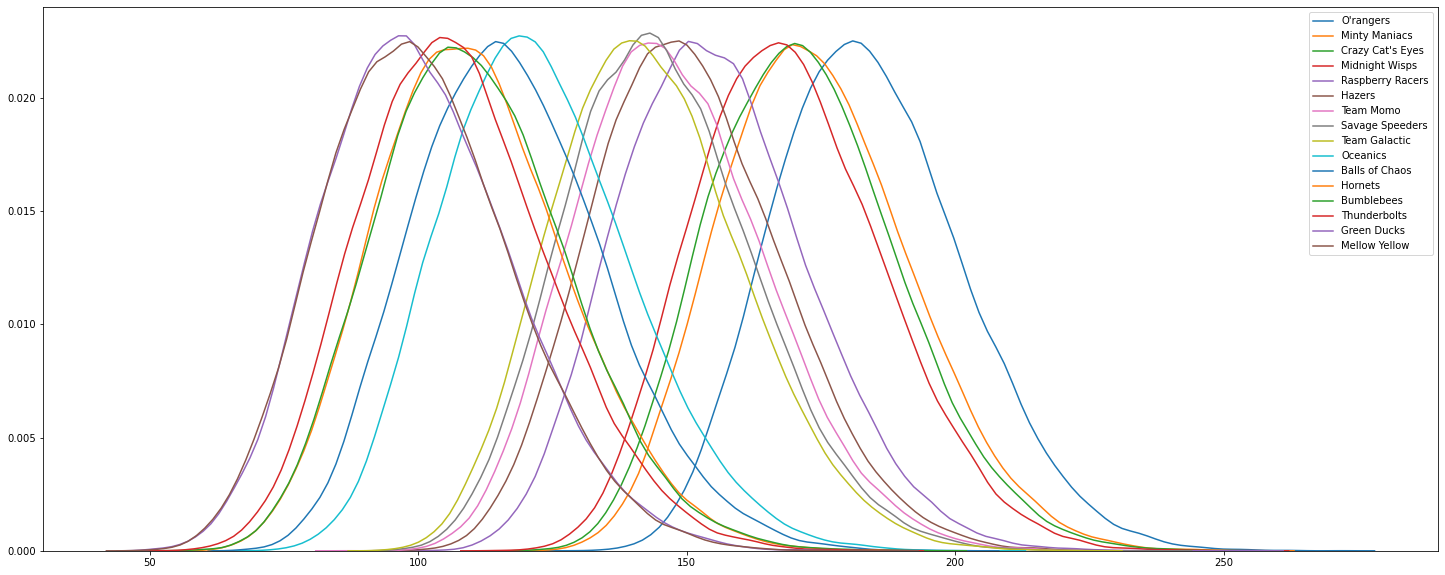

In [11]:
plt.figure(figsize=(25,10))
for idx, row in scores.iterrows():
    print(idx)
    sns.kdeplot(row, label = idx)
plt.legend()
plt.savefig("scores_hist.png")
plt.show()

O'rangers
Minty Maniacs
Crazy Cat's Eyes
Midnight Wisps
Raspberry Racers
Hazers
Team Momo
Savage Speeders
Team Galactic
Oceanics
Balls of Chaos
Hornets
Bumblebees
Thunderbolts
Green Ducks
Mellow Yellow


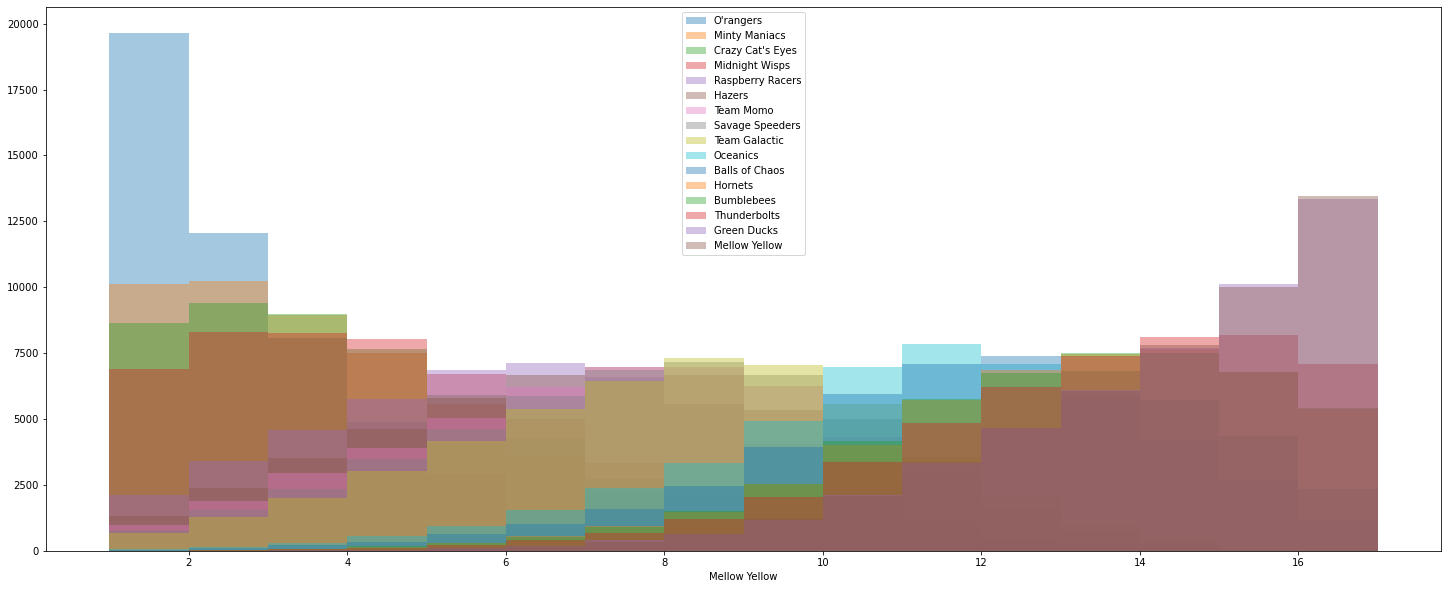

In [12]:
plt.figure(figsize=(25,10))
for idx, row in ranks.iterrows():
    print(idx)
    sns.distplot(row, label = idx, kde = False, bins = range(1,18))
plt.legend()
plt.savefig("ranks_hist.png")
plt.show()

In [13]:

# rankCounts = pd.DataFrame(df["Team"])
# rankCounts = rankCounts.set_index("Team")
# for i in range(1, 17):
#     print(i)
#     rankCounts[str(i)] = ranks[(i <= ranks) & (ranks < i+1)].count(axis = 1)
# rankCounts


In [14]:
# sns.set()
# plt.figure(figsize=(25,15))
# rankCounts2 = rankCounts2/500
# sns.heatmap(rankCounts2, annot = True)
# plt.show()

In [15]:
rankHeatmap = pd.DataFrame(index = df.index)
for idx, row in ranks.iterrows():
    counts = row.value_counts(normalize = True)
    for i in range(1, 17):
        rankHeatmap.loc[idx, i] = counts[(counts.index >= i) & (counts.index < i+1)].sum()
rankHeatmap

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Team,,,,,,,,,,,,,,,,
O'rangers,0.39290,0.24136,0.16128,0.09788,0.05800,0.02984,0.01298,0.00442,0.00102,0.00030,0.00002,0.00000,0.00000,0.00000,0.00000,0.00000
Minty Maniacs,0.20256,0.20460,0.17894,0.15032,0.11140,0.07274,0.04398,0.02322,0.00878,0.00268,0.00074,0.00004,0.00000,0.00000,0.00000,0.00000
Crazy Cat's Eyes,0.17316,0.18804,0.17982,0.15334,0.11830,0.08572,0.05484,0.02994,0.01242,0.00338,0.00098,0.00004,0.00002,0.00000,0.00000,0.00000
Midnight Wisps,0.13828,0.16588,0.16554,0.16052,0.13422,0.09972,0.06680,0.03990,0.02032,0.00682,0.00154,0.00034,0.00010,0.00002,0.00000,0.00000
Raspberry Racers,0.04200,0.06810,0.09190,0.11548,0.13722,0.14250,0.13172,0.11136,0.08070,0.04598,0.02156,0.00860,0.00244,0.00038,0.00006,0.00000
Hazers,0.02606,0.04758,0.07028,0.09274,0.11632,0.13308,0.13972,0.13374,0.10718,0.06818,0.03850,0.01782,0.00640,0.00206,0.00034,0.00000
Team Momo,0.01990,0.03776,0.05896,0.07776,0.10092,0.12462,0.13916,0.13932,0.12494,0.08612,0.05080,0.02498,0.01102,0.00296,0.00066,0.00012
Savage Speeders,0.01560,0.03066,0.04724,0.06970,0.09252,0.11780,0.13720,0.14330,0.13360,0.10020,0.05900,0.03158,0.01460,0.00560,0.00128,0.00012
Team Galactic,0.01342,0.02564,0.04028,0.06050,0.08354,0.10736,0.12856,0.14620,0.14072,0.11130,0.07152,0.04172,0.01984,0.00738,0.00168,0.00034


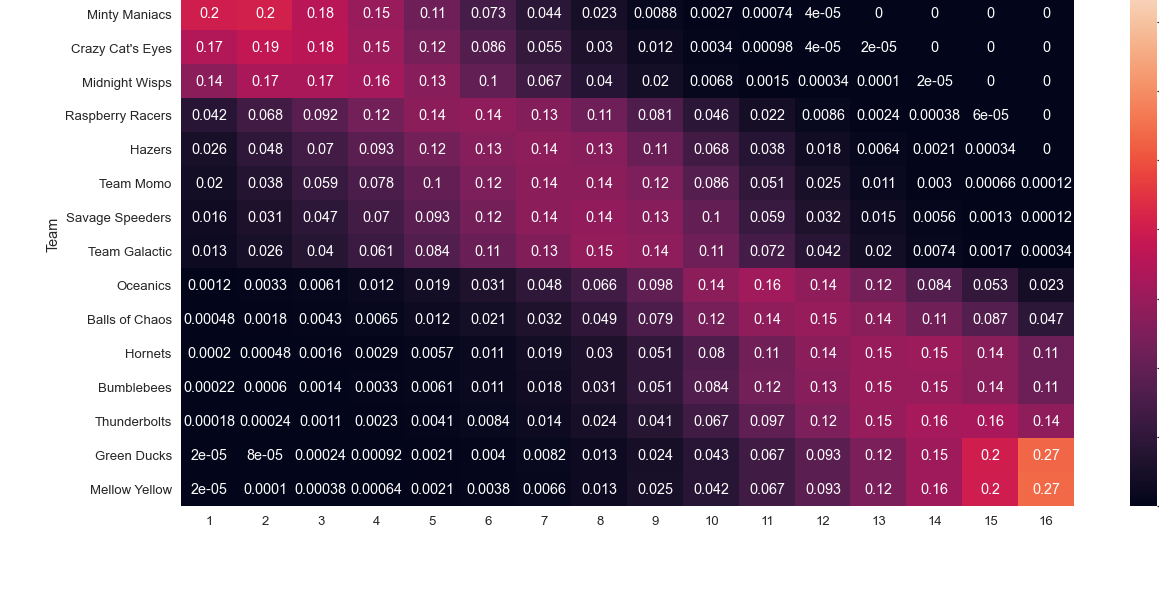

In [16]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1.2)
plt.title("Heatmap of Placement Probabilities")
plt.xlabel("Rank")
sns.heatmap(rankHeatmap, annot = True)
plt.savefig("rankHeatmap.png", dpi = 200, facecolor = 'white', transparent = False)
plt.show()

In [17]:
def fillDfFixed(oldDf, colsToLeave):
    filledDf = oldDf.copy()
    for col in oldDf.columns[colsToLeave:]:
        rng.shuffle(poss_scores)
        filledDf[col] = poss_scores
    filledDf["sum"] = filledDf.sum(axis=1)
    filledDf["rank"] = filledDf["sum"].rank(ascending=False)
    return filledDf

In [18]:
firstPlaceHistories = pd.DataFrame(index = df.index)
for eventsToIgnore in range(0, numColsFilled + 1):
    ranks = pd.DataFrame(index = df.index)
    print(f"Keeping {eventsToIgnore} event(s)")

    for i in range(25000):
        if i % 500 == 0:
            print(i)
        scenario = fillDfFixed(df, eventsToIgnore)
        ranks[i] = scenario["rank"]
    
    for idx, row in ranks.iterrows():
        counts = row.value_counts(normalize = True)
        firstPlaceHistories.loc[idx, eventsToIgnore] = counts[counts.index < 2].sum()




Keeping 0 event(s)
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
Keeping 1 event(s)
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
Keeping 2 event(s)
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
Keeping 3 event(s)
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500


In [19]:
# print(colorDict)
colorDict = {
    'Minty Maniacs': "#429e9d",
    "O'rangers": "#fd6a02",
    "Crazy Cat's Eyes": "green",
    'Raspberry Racers': "#e30b5d",
    'Midnight Wisps': "#02075d",
    'Team Galactic': "#7F00FF",
    'Savage Speeders': "#800000",
    'Balls of Chaos': "#cc7722",
    'Hazers': "grey",
    'Bumblebees': "#f1b82d",
    'Team Momo': "#1C004D",
    'Green Ducks': "#228c22",
    'Thunderbolts': "blue",
    'Hornets': "#9acd32",
    'Oceanics': "#265b5f",
    'Mellow Yellow': "#ffd300"
}

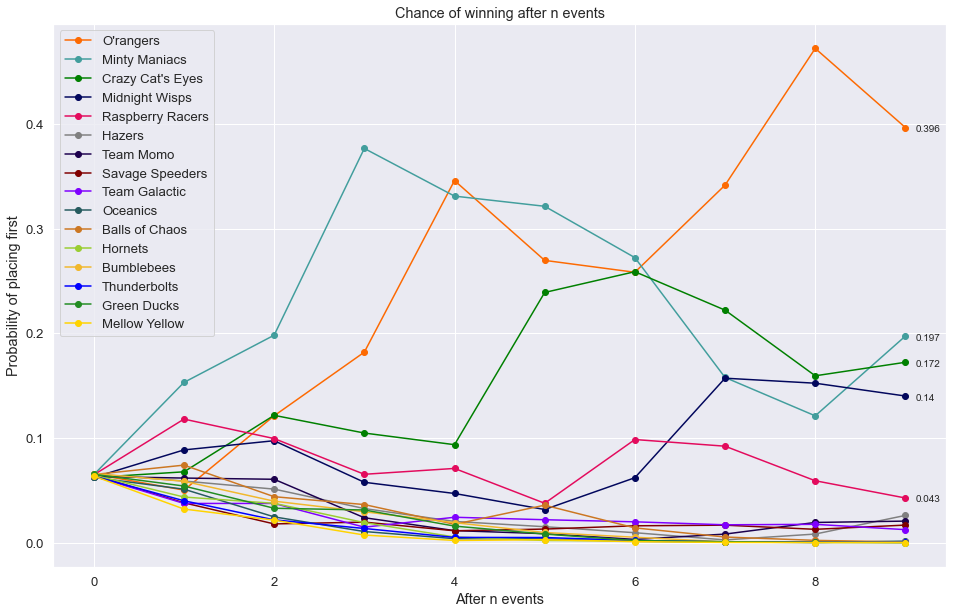

In [20]:
plt.figure(figsize = (16, 10))
sns.set(font_scale=1.2)
# colorDict = {}
for idx, row in firstPlaceHistories.iterrows():
    # colorDict[idx] = "#000000"
    plt.plot(range(numColsFilled + 1), row, label = idx, marker = 'o', color = colorDict[idx])
for idx, row in list(firstPlaceHistories.iterrows())[:5]:
    plt.annotate(round(row[numColsFilled], 3), (numColsFilled, row[numColsFilled]), ha="left", textcoords="offset points", xytext=(10,-4), fontsize = 'x-small')
plt.title("Chance of winning after n events")
plt.ylabel("Probability of placing first")
plt.xlabel("After n events")
plt.legend()
plt.savefig("rankHistory.png", dpi = 200)
plt.show()

In [21]:
# g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5)

# # Draw the densities in a few steps
# g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
# g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
# g.map(plt.axhline, y=0, lw=2, clip_on=False)


# # Define and use a simple function to label the plot in axes coordinates
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(0, .2, label, fontweight="bold", color=color,
#             ha="left", va="center", transform=ax.transAxes)


# g.map(label, "x")

# # Set the subplots to overlap
# g.fig.subplots_adjust(hspace=-.25)

# # Remove axes details that don't play well with overlap
# g.set_titles("")
# g.set(yticks=[])
# g.despine(bottom=True, left=True)